<a href="https://colab.research.google.com/github/Ecatos/Data-Analysis-Portfolio-Emilio-Riccioli/blob/main/Analisi%20KPI%20azienda%20Retail%20con%20Power%20BI%20e%20DAX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Analisi KPI azienda Retail con Power BI e DAX**

##### *Dal Data Model e trasformazione dati fino alla creazione di un report Power BI con UI personalizzata*

####REPORT (Google Drive): [LINK](https://drive.google.com/file/d/1eBDOggyWDUOSVu2SSSwCrc26d6QnTBYk/view?usp=drive_link)
(pdf, purtoppo la condivisione e l'accesso al cruscotto Power Bi Service è possibile solo con account aziendali a pagamento)

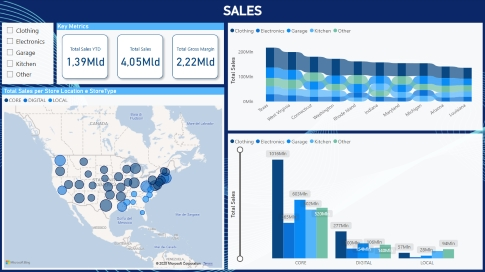
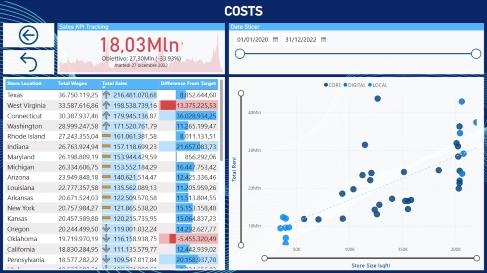

## **Obiettivi**

#### Analisi e visualizzazione dati di vendita azienda Retail

#### Aggiunta funzioni per la User Experience
* cross-filtering</li>
* sync-slicers</li>
* drill-trough</li>
* bookmarks</li>


#### Pubblicazione e condivisione tramite Power BI Service

##**Strumenti**

> Power Query Editor

> DAX

> Power BI Desktop

> Power BI Service

###**1.**    Preprocessing dei dati con POWER QUERY EDITOR

####**1.1**    Caricamento origine dati e primi step Data Cleaning

Innanzitutto attiviamo la On-object interaction in

FILE >> OPZIONI E IMPOSTAZIONI >> OPZIONI >> FUNZIONALITA' DI ANTEPRIMA >> INTERAZIONE SU OGGETTO
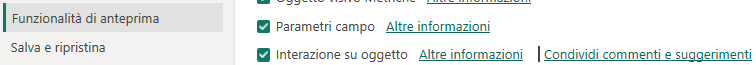

Accesso a Power Query Editor con TRASFORMA DATI

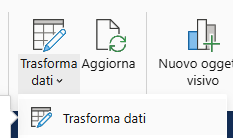


Importazione con RECUPERA DATI

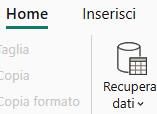

L'origine dati è composta da 3 file .csv, 1 file .txt e 2 file .xlsx
<ul type= "circle">
    <li>Sales Retail 2020 – 2022 (csv) </li>
    <li>Store Details (csv)</li>
    <li>Store Size (csv)</li>
    <li>Date (testo)</li>
    <li>Retail Fixed Costs (excel)</li>
    <li>Department List (excel)</li>
</ul>

Per Department List carichiamo solamente il primo foglio "categories", poichè l'unico popolato
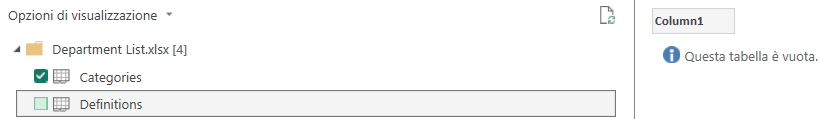

Eliminiamo da tutte le tabelle gli eventuali APPLIED STEPS automatici (PROMOTED HEADERS + CHANGED TYPE, Origine ok indica l'upload)

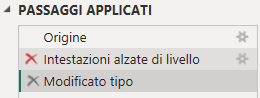

Riempimento vuoti in "Store Details" (colonna StoreType) con

TRANSFORM-->FILL DOWN

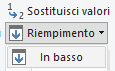

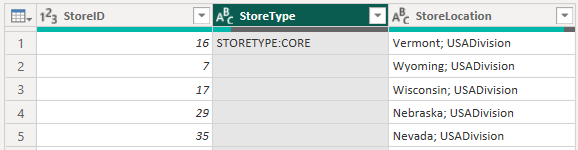

Al momento però non funziona poichè fill down richiede valori Null e non blank

Risolviamo con TRANSFORM --> REPLACE VALUES

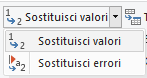

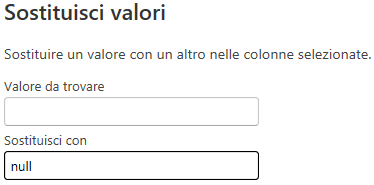

Ora fill values funziona

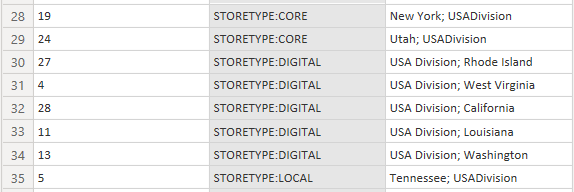

Con MERGE QUERIES (che è uguale alla JOIN di Sql) uniamo le tabelle Store Details e Store Size

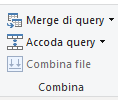

Attenzione che in origine la Primary Key StoreID era di tipo testo, ma è stata necessaria una conversione in integer. Inoltre ho promosso la prima riga come intestazione sia su Store Details che su Store Size

Nella preview seleziono le colonne Primary Key su cui effettuare il merge per entrambe le tabelle
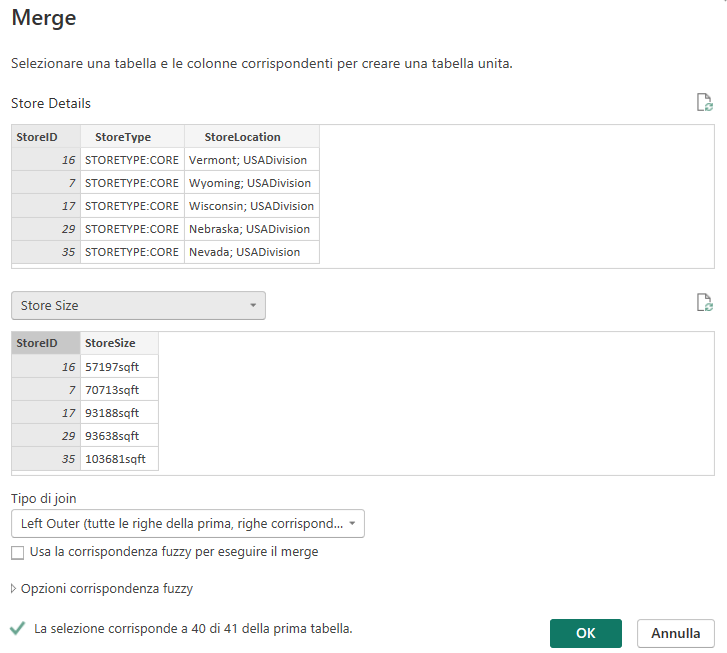

Espandiamo l'output lasciando visibili solo le informazioni non ridondanti

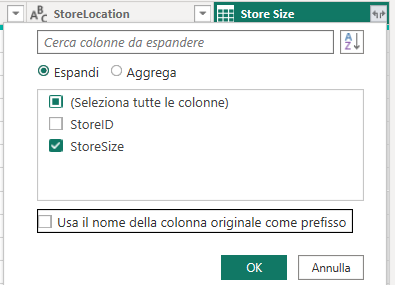

Merge completato

Eliminiamo ora il testo ridodante dalla colonna StoreType ("storetype:" ripetuto su ogni valore) con

EXTRACT >> TRANSFORM >> TEXT AFTER DELIMITER

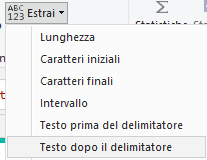

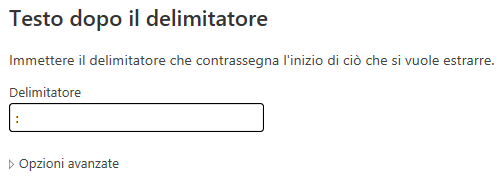

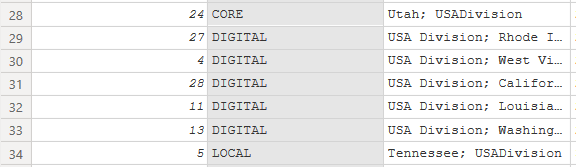

Ora separiamo in due colonne distinte le informazioni contenute in StoreLocation con

SPLIT COLUMN >> TRANSFORM

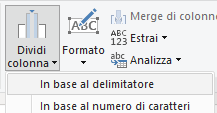


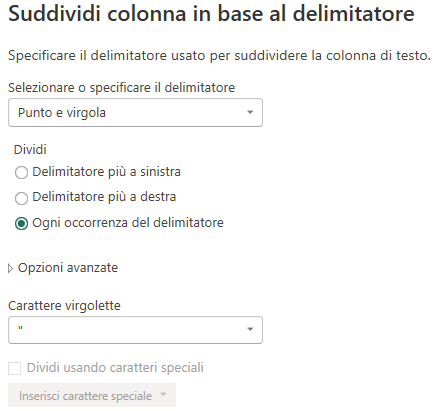

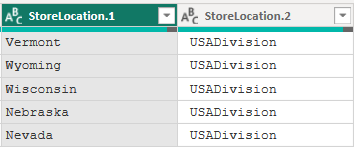

La nuova colonna StoreLocation.2 ha uno spazio vuoto davanti ciascun valore, lo eliminimiamo con

FORMAT >> TRIM

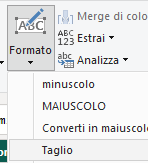

Nella colonna StoreSize ottenuta dal merge possiamo eliminare il testo "sqft" e lasciare solo il valore numerico con

SPLIT COLUMN BY DIGIT TO NON-DIGIT


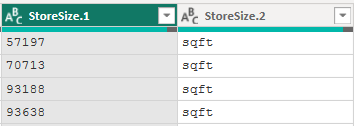

Spostiamoci sulla tabella Sales Retail

Eliminiamo i metadati importati (prime 10 righe)

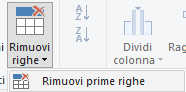

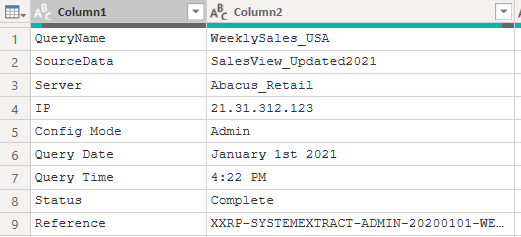

Promuoviamo la prima riga ad intestazione con

USE FIRST ROW AS HEADERS

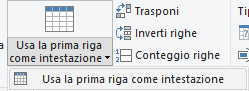

Elimino colonna "Ref1"

Ora dobbiamo effettuare un re-shape dei dati:
questa tabella presenta infatti molteplici colonne con i dati di vendita per ciascuna data
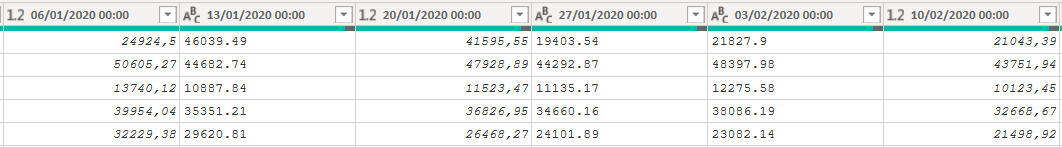


Con UNPIVOT OTHER COLUMNS andremo a riassumere i dati con due sole colonne

Avremo come risultato tutte le combinazioni chiave-valore



Passeremo quindi dal formato: 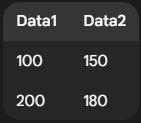
al formato:
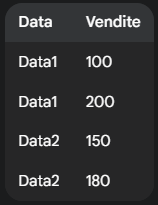

Output:

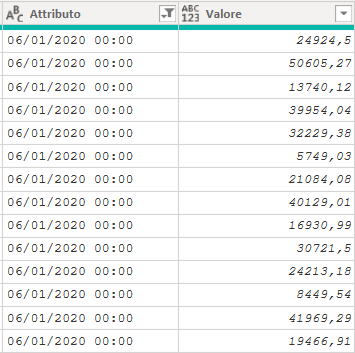

Sistemiamo la colonna Attributo
<ul type= "circle">
    <li>Rinominiamo in Date</li>
    <li>Con EXTRACT eliminiamo l'orario 00.00 usando " " come delimiter</li>
    <li>Cambiamo formato in data con USING LOCALE</li>
</ul>

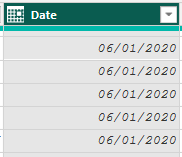

Settiamo inoltre tipo decimale sulla colonna Value

Con KEEP ERRORS verifichiamo la presenza di eventuali errori di formato che sono stati automaticamente corretti (fortunatamente non ne abbiamo)

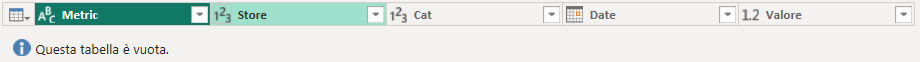

Correggiamo i blank values della colonna Sales (abbiamo due valori Sales e Margin) con lo stesso procedimento usato prima per StoreType (REPLACE VALUES + FILL DOWN)

Ora eseguiamo un PIVOT dei dati (operazione inversa rispetto a prima) sdoppiando la colonna Metric (valori Sales oppure Margin) in due colonne separate, e riducendo così il numero effettivo di righe totali
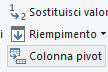
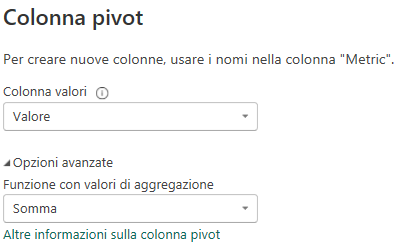

Output:
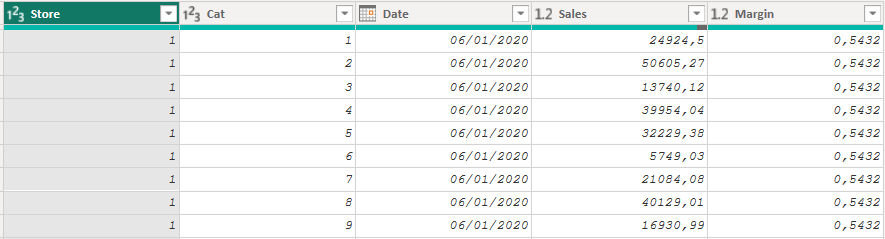

Passiamo alla tabella "Date"

modifichiamo il tipo di dato della prima colonna da testo a data

aggiungiamo informazioni con ADD COLUMN >> DATE

fino ad avere il layout seguente:
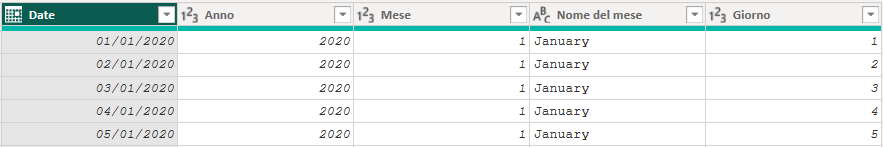


####**1.2**    Data Transformation, custom e conditional columns

Creiamo CUSTOM COLUMN per il Gross Margin con Sales * Margin

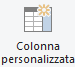
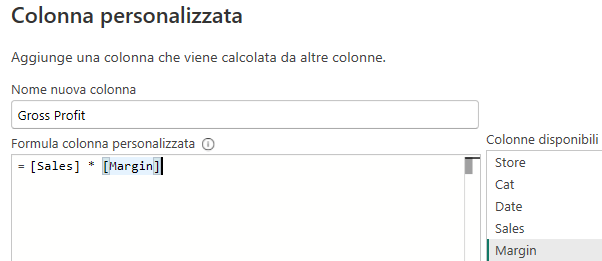

Nella colonna StoreLocation.1 e StoreLocation.2 riscontriamo dati superflui (il valore USADivision è presente in entrambe le colonne ed è attribuibile a tutti)

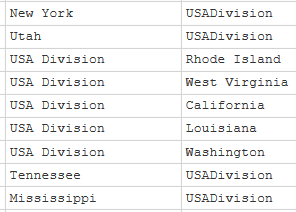

Andiamo a generare una colonna unica e pulita contenente solamente gli stati, tramite un condizionale IF-ELSE

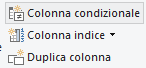
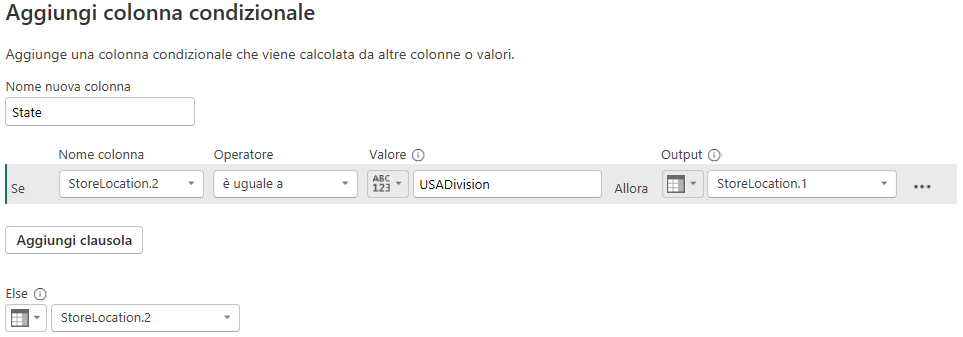

###**2.**   Data Normalization: Data Model e misure DAX

####**2.1**    Data Modeling (Star Schema)

Organizziamo i dati in una struttura che sia efficiente sia per il reporting che per la velocità delle query

Primo step sarà relazionare la tabella centrale FACT con le tabelle DIMENSION

Creiamo connessione ONE TO MANY tra "StoreID" e "Store"

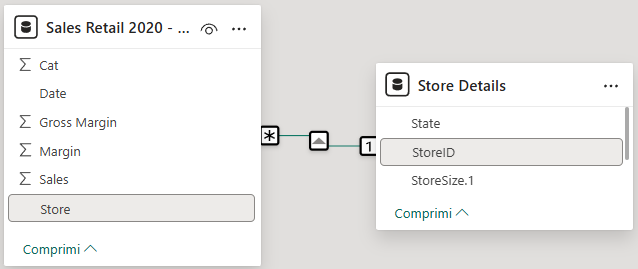

Poi connessione One To Many tra "CategoryID" e "Cat"

Riceviamo errore poichè sulla primary key CategoryID sono presenti duplicati, andiamo e eliminarli

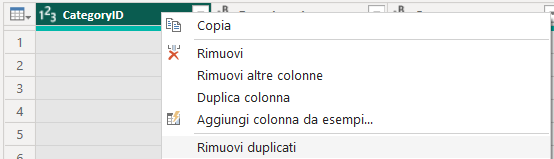

Infine concludiamo lo schema con One to Many tra Date (Fact) e Date (Dim)

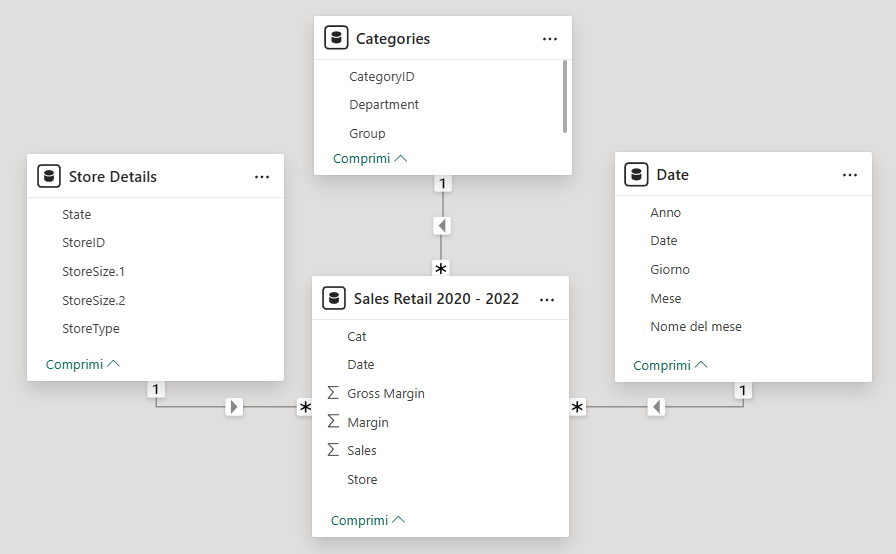

Ripetiamo questo processo anche per la Fact Table relativa ai costi (ai cui dati sarà dedicata una pagina del report)
*   One to Many: StoreID (Dim) <<>> StoreID (Fact)
*   One to Many: Date (Dim) <<>> Date (Fact)

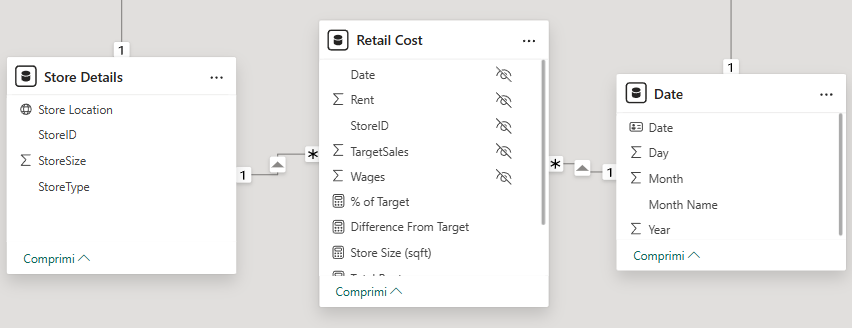

Per good practice nascondiamo dalle Fact Table le Foreign Keys e le colonne quantitative (creeremo misure apposite: vedi 2.2)

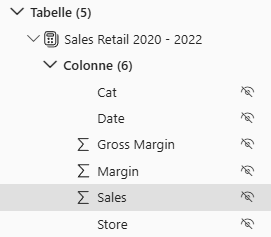
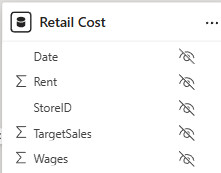

####**2.2**    Misure DAX e colonne calcolate

Cosa distingue una misura da una colonna calcolata?

La prima riassume righe multiple di una tabella/colonna in un singolo output, la seconda calcola un output per ciascuna riga

Creiamo misure di aggregazione per
*   Total Sales
*   Total Margin
*   Total Gross Margin

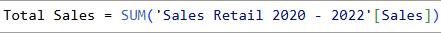

E per:
*   Total Rent
*   Total Target Sales
*   Total Wages
*   Store Size (sqft)

Dopodiché contrassegniamo la tabella Date come tabella data, passaggio fondamentale per il corretto funzionamento di time intelligence functions come year-to-date (YTD), quarter-to-date (QTD) o month-to-date (MTD)

Inoltre avere una tabella dedicata formattata correttamente conferisce consistenza ai dati su tutto il report e miglioramento delle performance

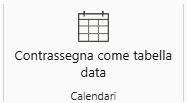

Assicuriamoci anche che l'ordinamento sia per Month numerico (per evitare che sia alfabetico per Month Name nel report)

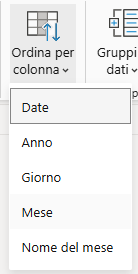

In "Store Details" (colonna "State") indichiamo la categoria di dati come "State or Province", ci servirà per il corretto funzionamento della geolocalizzazione nel report

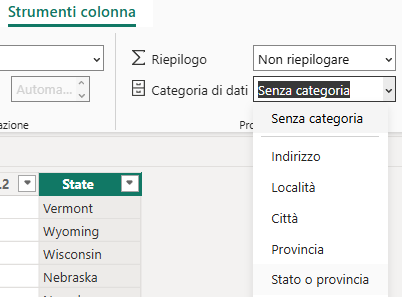

Nella tabela Categories creiamo una colonna calcolata che unisca le informazioni di Department e Group (semplice concatenazione di stringhe)

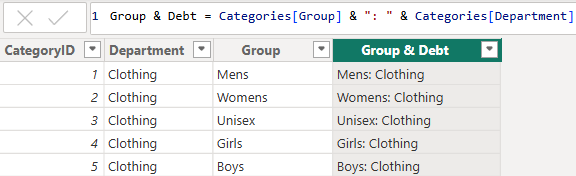

Da questo punto in poi implementiamo ITERATOR FUNCTIONS, che restituiscono la somma di un'espressione calcolata per ogni riga di tabella (in pratica in un solo passaggio accorpa le operazioni colonna calcolata+misura aggregazione)

Calcoliamo nuovamente il margine lordo con SUMX
image.png
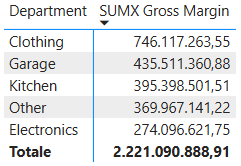


Grazie alla tabella "Date" (con date consecutive) possiamo generare il Kpi Total Sales YTD

Stavolta direttamente con la smart function QUICK MEASURE:

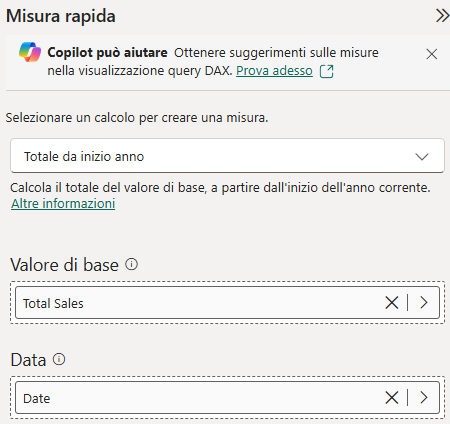
image.png

Visualizziamo la nuova misura per verificarne il funzionamento, mettendo a confronto:

1. Total Sales YTD: totale cumulativo alla data nel punto x, che con l’inizio di ogni nuovo anno si resetta e riparte da zero
2. Total Sales: venduto alla singola data

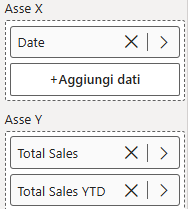
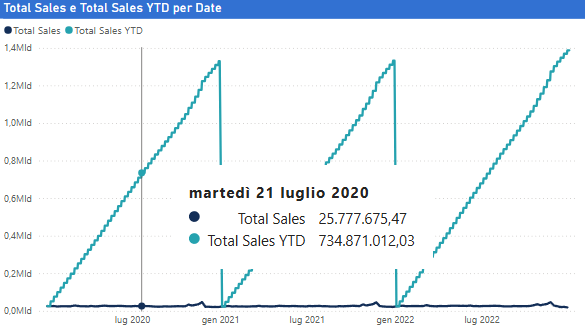




Passiamo ai costi, dove creiamo misura per il KPI "Difference From Target", formattata come valuta con zero decimali
image.png

Concludiamo con una misura che rappresenti la % relativa dei sales rispetto al target, poichè con il valore assoluto avremmo problemi di visibilità nei grafici (vedi 3.2), visto il forte spread

image.png

###**3.**    Visuals & Report

####**3.1**    Grafici

Ora che abbiamo normalizzato l'origine dei dati e creato misure DAX per i nostri KPI
1.   Total Sales YTD
2.   Difference From Target
3.   % of Target

procediamo con la creazione del report partendo dalla pagina relativa alle vendite




Partiamo con un istogramma a colonne in pila per le vendite divise tra tipologia di negozio e dipartimento

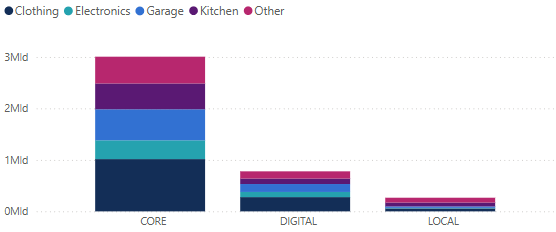

Local è poco distinguibile, cambiamo tipologia grafico a istogramma a colonne raggruppate
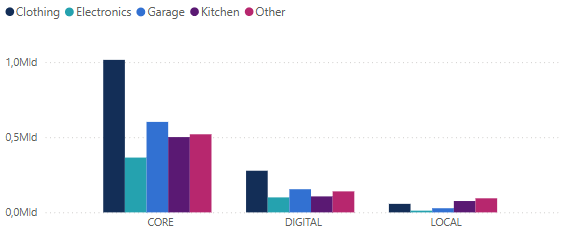
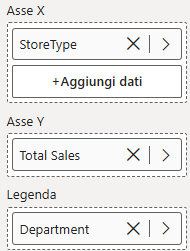

Ora una mappa per le vendite divise per località e tipologia di negozio
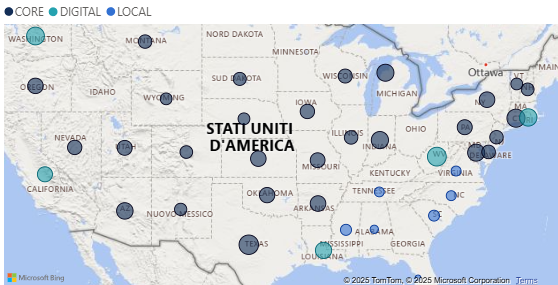
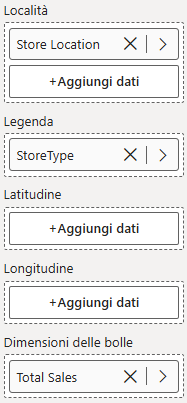


E un grafico a nastri (ribbon chart) per le vendite dei negozi suddivise per tipologia
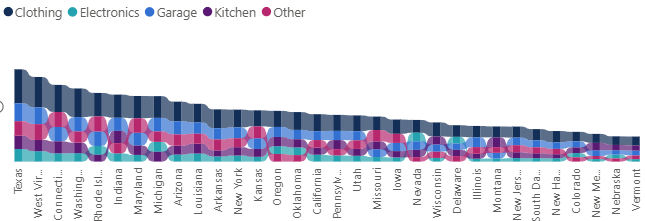

è abbastanza illegibile, filtriamolo per i primi 10 negozi per valore di total sales:
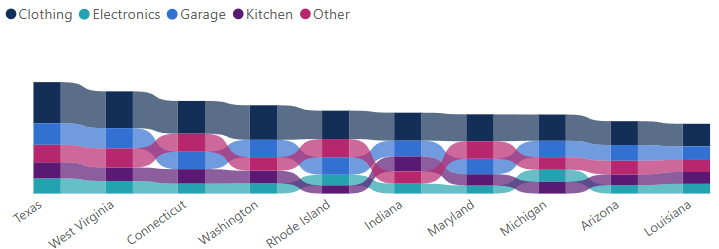

Come ultima visualizzazione per questa pagina inseriamo una Card/Scheda per i KPI

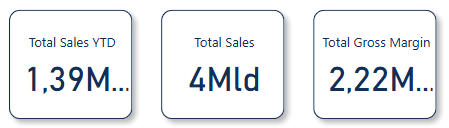
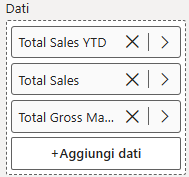

Infine un filtro che permetta all'utente di visionare le vendite relative ad uno solo o ad una combinazione di più dipartimenti

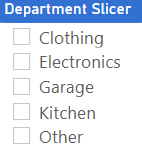
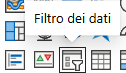

Passiamo alla seconda pagina del report, relativa ai costi

Apriamo con un grafico a dispersione per visualizzare la relazione tra la Store Size ed il Total Rent

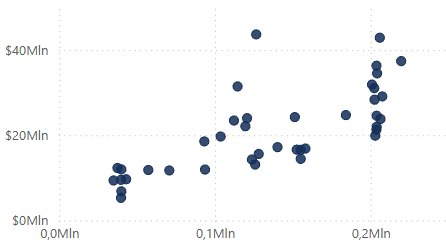

Formattiamo aggiungendo titoli sugli assi, indicando StoreType come legenda ed aumentando le dimensioni dei markers/marcatori
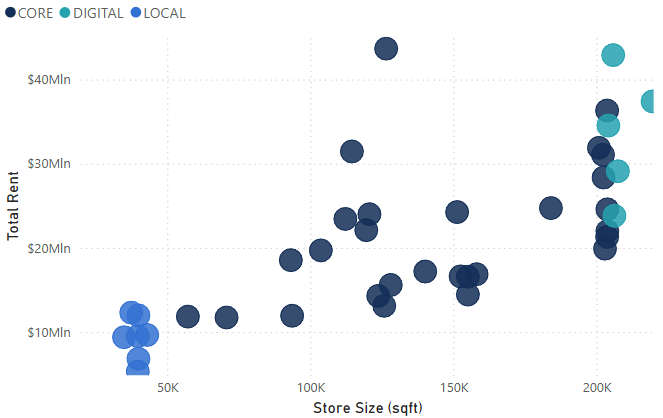

Nella prossima sezione dedicata alla User Experience (3.2) vedremo come finalizzare questo grafico


Prepariamo una KPI CARD per la metrica Difference From Target, con aggiunta di icone, asse di tendenza ed obiettivo

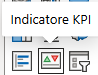
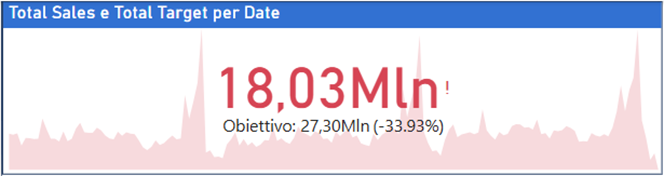

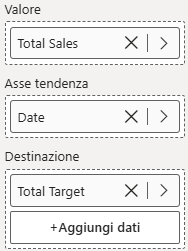
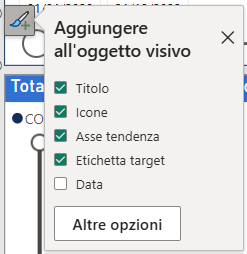

Ed una tabella per Store Location-Total Wages-Total Sales e Difference From Target

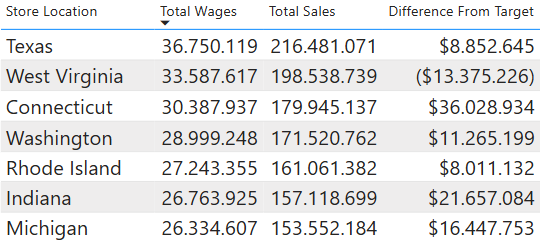

Infine completiamo la pagina del report con un normalissimo DATE SLICER (filtro data)
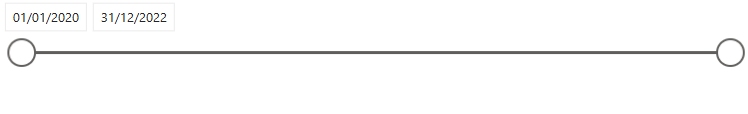

####**3.2**    User Experience

Possiamo ora raffinare le nostre visuals ed il nostro report aggiungendo alcuni miglioramenti per la UI

1.   Sincronizzazione slicers tra le pagine
2.   Zoom sliders ai grafici
3.   Formattazione condizionale
4.   Segnalibri per il reset dei filtri
5.   Drill-trough da pagina costi a pagina vendite



Come prima cosa modifichiamo le impostazioni del cross-filtering

FORMATO >> MODIFICA INTERAZIONI

Impostiamo comportamento "filtro" sulla mappa e lasciamo "evidenziazione" (default) su grafico a nastri e a barre

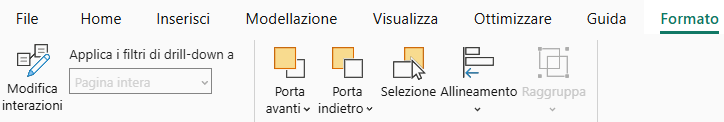

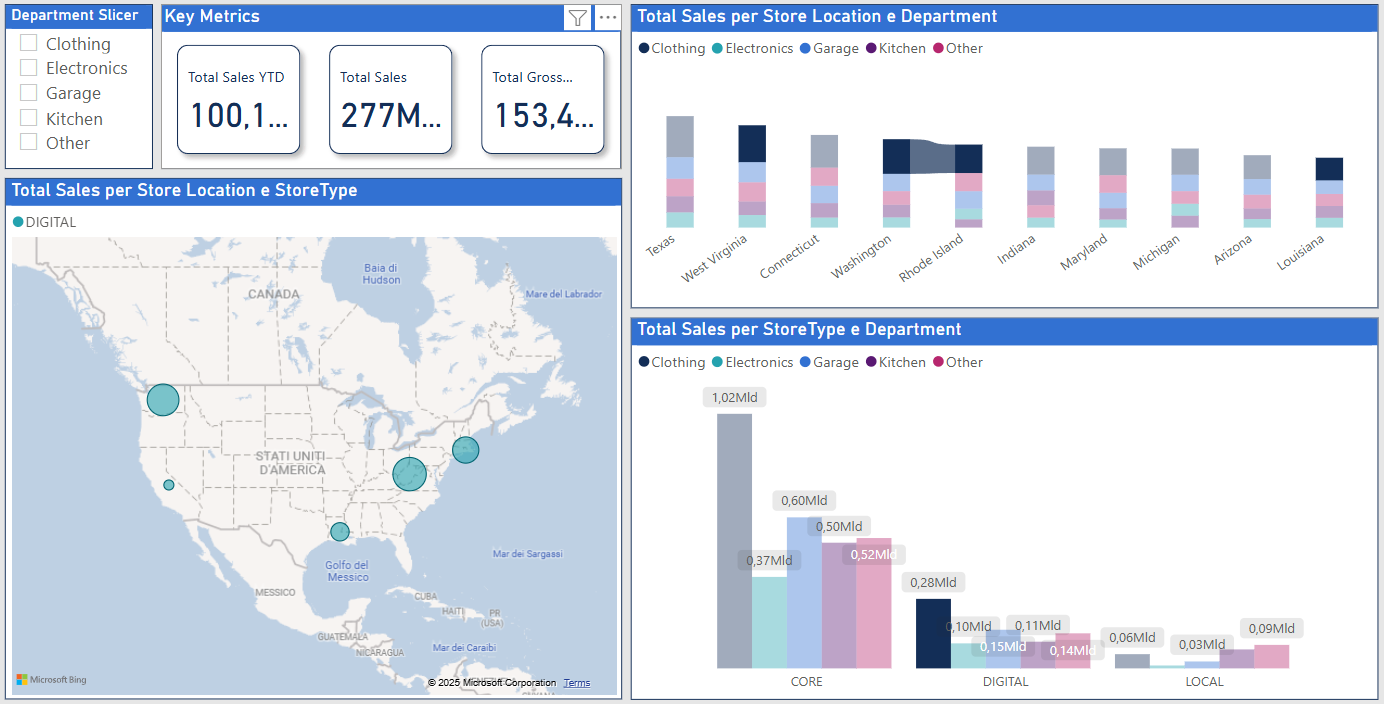

E "filtro" nella scheda costi sia per la tabella che per il grafico a dispersione

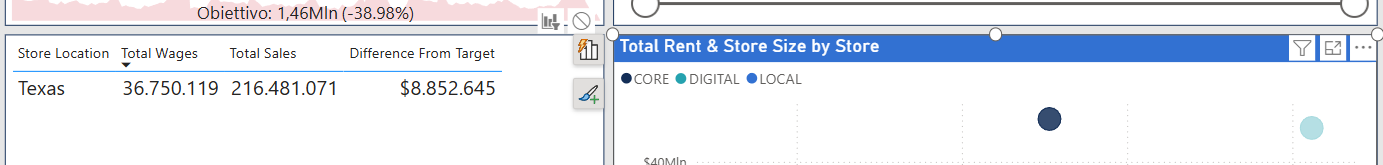

Aggiungiamo interattività al grafico a dispersione aggiungendo un asse di riproduzione/PLAY AXIS. Quest'ultimo aggiunge un'animazione che mostra l'andamento anno per anno

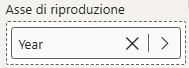

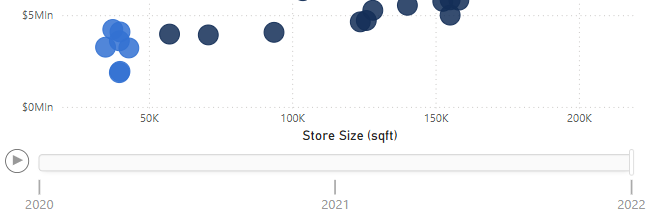

Proseguiamo con la sincronizzazione dei filtri tra le pagine (Sync Slicers) per il date slicer della pagina costi

Di fatto farà in modo che la restrizione del range di date venga applicato anche al primo foglio, senza essere visualizzato

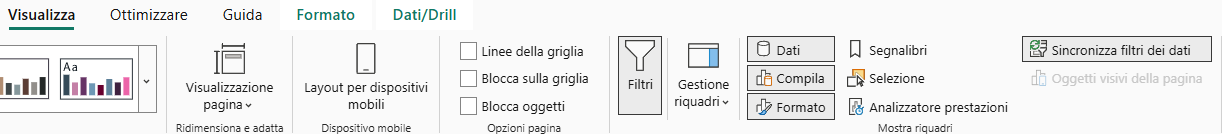
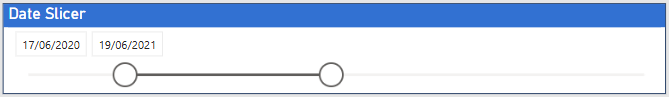
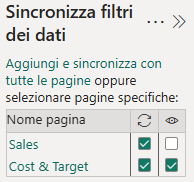

Aggiungiamo un ulteriore livello di esperienza utente con i dispositivi di scorrimento zoom/ZOOM SLIDER che permettono di zoomare sui grafici dai dati continui senza la necessità di doverne modificare la scala

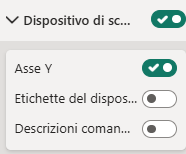
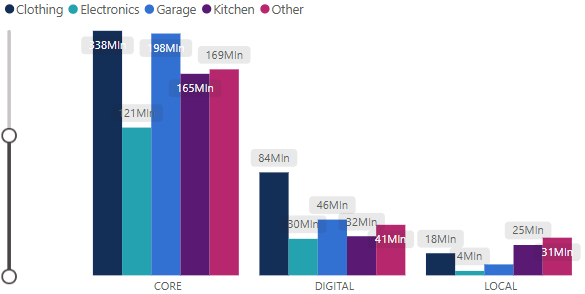



Ora completiamo la tabella nella pagina dei costi con della formattazione condizionale

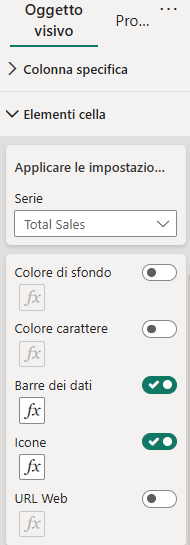

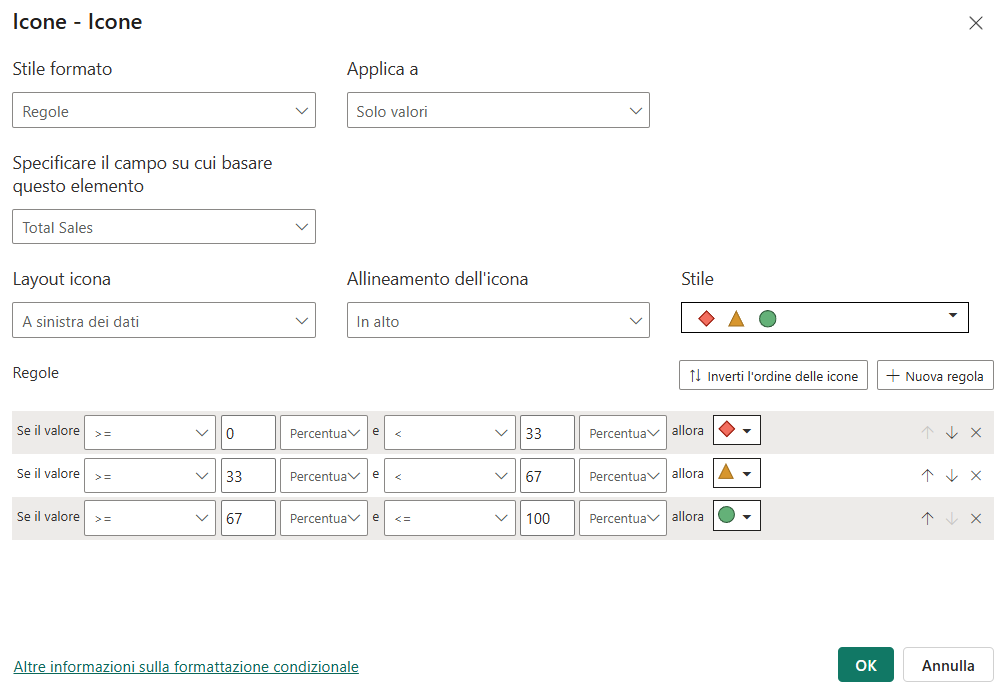

La formattazione per difference from target è il motivo per cui abbiamo implementato la misura % of Target (era impossibile settare una regola sui valori assoluti)

Su questa colonna oltre alla barra dei dati colorata e direzionale per valori assoluti negativi/positivi aggiungiamo colore di sfondo (vedi screen sotto)
* riga sfondo verde per superamento del target > del 15%
* riga sfondo neutro superamento target minore del 15%
* riga sfondo rosso per mancato raggiungimento target

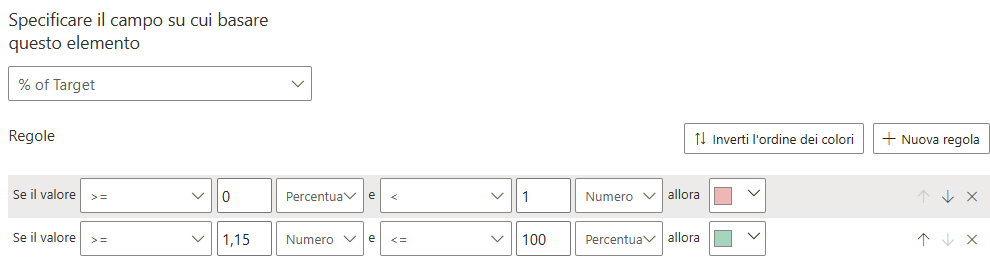

Risultato finale:
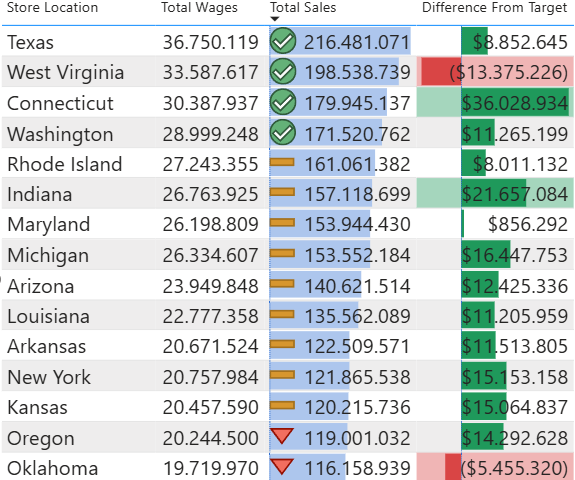

Sfruttiamo ora la funzione segnalibri/BOOKMARKS, che permette di salvare un'istantanea del report in qualsiasi stato o filtered context

Salviamo quindi il report al suo stato originale e privo di filtri

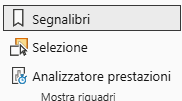
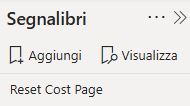

Colleghiamo l'azione reset ad un oggetto pulsante

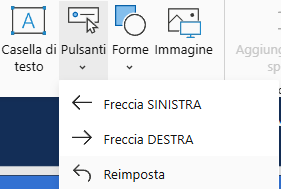
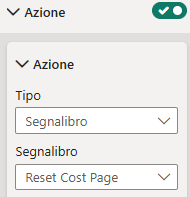
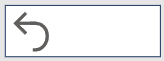

Incorporiamo un DRILL-TROUGH dalla pagina sales alla pagina costi

FORMATO >> DRILL-TROUGH

lo settiamo su StoreType: facendo click destro su uno storetype (local, core o digital) nella pagina sales l'utente sarà reindirizzato alla pagina costi con una overview sul tipo di negozio selezionato

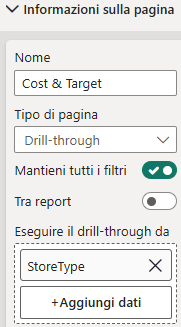
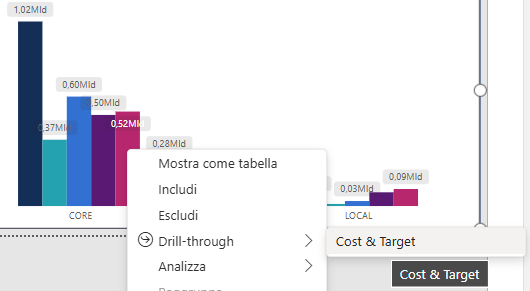

Navigazione a pagina costi per store type digital:

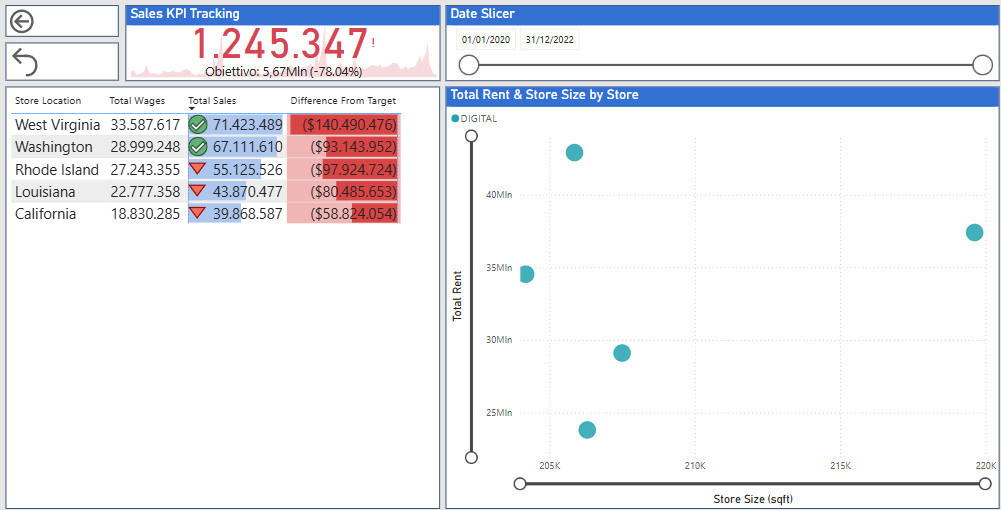